# Instructions:
To complete the following task using Python, please download an
Integrated Development Environment (IDE) of your choice. Ensure that your solution
includes both the written code (input) and its corresponding output. Once completed,
upload your solution in PDF format or any other format you prefer. The questions
are worth 50 points each.

# Question 2: Predicting Building Energy Efficiency
## Objective:
Apply regression techniques using Scikit-learn to analyze and predict the energy efficiency
of buildings, focusing on heating and cooling load requirements. This involves the use of
various regression models, feature engineering, and model evaluation.
## Dataset:
The dataset for this assignment, Energy Efficiency Dataset, can be found at the UCI
Machine Learning Repository. It includes architectural features and energy efficiency
metrics of buildings. The dataset columns are renamed for clarity as follows:
```
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area',
'X5': 'Overall_Height', 'X6': 'Orientation',
'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution',
'Y1': 'Cooling_Load', 'Y2': 'Cooling_Load'}
```

All of the imports

In [165]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import resample
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Task 1
Data Preprocessing:
- Perform exploratory data analysis (EDA) after loading the dataset.
- Conduct feature engineering if necessary.


In [36]:
# fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 
  
# data (as pandas dataframes) 
X1 = energy_efficiency.data.features 
y1 = energy_efficiency.data.targets 
  
# metadata 
print("Source data metadata:")
print(energy_efficiency.metadata) 
  
# variable information
print("")
print("Source data variable information:")
print(energy_efficiency.variables)

# X descriptive statistics 
print("")
print("Feature descriptive statistics:")
print(X1.describe())

print("")
print("Target descriptive statistics:")
print(y1.describe())


Source data metadata:
{'uci_id': 242, 'name': 'Energy efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Sat Jan 27 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learnin

In [37]:
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area',
'X5': 'Overall_Height', 'X6': 'Orientation',
'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
print("")
print("Renaming the columns per:")
print(column_names)
X = X1.rename(columns=column_names)
y = y1.rename(columns=column_names)
print("")
print("New X:")
print(X)
print("")
print("New y:")
print(y)


Renaming the columns per:
{'X1': 'Relative_Compactness', 'X2': 'Surface_Area', 'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height', 'X6': 'Orientation', 'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution', 'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

New X:
     Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.98         514.5      294.0     110.25             7.0   
4                    0.90         563.5      318.5     122.50             7.0   
..                    ...           ...        ...        ...             ...   
763                  0.64         784.0      343.0     220.50             3.5   
764                  0.62         808.5      367.5     220.50             3.5   

I did not see any need for feature engineering. The data looks good, there are no missing values, and I cannot see any new calculated values. I did consider vectorizing several of the columns but felt that it was not necessary.

## Task 2
Model Development:
- Implement various regression models (Linear Regression, Ridge, Lasso, and
Elastic Net).
- Implement Random Forest Regression (Bonus Question - 5pts)
- Perform hyperparameter tuning for optimization.

Before we start, lets split the data into Test and Training data.

### Task 2.1.1

Linear Regression Heating

Perform a hyperparameter search.

In [169]:
param_grid = {'fit_intercept': [True, False]}
grid = GridSearchCV(LinearRegression(), param_grid, cv=7)
grid.fit(X, y['Heating_Load'])
grid.best_params_

{'fit_intercept': True}

In [38]:
modelLRHeat = LinearRegression(fit_intercept=True)
modelLRHeat.fit(X, y['Heating_Load'])
y['LR_Heating_Pred'] = modelLRHeat.predict(X)

print("")
print("Linear regression heating intercept:")
print(modelLRHeat.intercept_)
print("Linear regression heating coefficients:")
print(modelLRHeat.coef_)


Linear regression heating intercept:
84.02514989141984
Linear regression heating coefficients:
[-6.47799117e+01  5.16051850e+09 -5.16051850e+09 -1.03210370e+10
  4.16990185e+00 -2.33339527e-02  1.99326852e+01  2.03771530e-01]


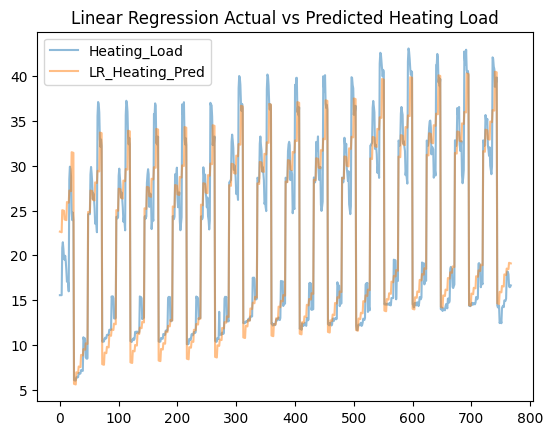

In [155]:
x = y[['Heating_Load', 'LR_Heating_Pred']].plot(alpha=0.5, title="Linear Regression Actual vs Predicted Heating Load")

In [40]:
paramsLRHeat = pd.Series(modelLRHeat.coef_, index=X.columns)
paramsLRHeat

Relative_Compactness        -6.477991e+01
Surface_Area                 5.160518e+09
Wall_Area                   -5.160518e+09
Roof_Area                   -1.032104e+10
Overall_Height               4.169902e+00
Orientation                 -2.333395e-02
Glazing_Area                 1.993269e+01
Glazing_Area_Distribution    2.037715e-01
dtype: float64

In [41]:
np.random.seed(1)
errLRHeat = np.std([modelLRHeat.fit(*resample(X, y['Heating_Load'])).coef_
              for i in range(1000)], 0)

In [42]:
print(pd.DataFrame({'effect': paramsLRHeat.round(0),
                    'error': errLRHeat.round(0)}))

                                 effect         error
Relative_Compactness      -6.500000e+01  7.000000e+00
Surface_Area               5.160518e+09  8.850195e+11
Wall_Area                 -5.160518e+09  8.850195e+11
Roof_Area                 -1.032104e+10  1.770039e+12
Overall_Height             4.000000e+00  0.000000e+00
Orientation               -0.000000e+00  0.000000e+00
Glazing_Area               2.000000e+01  1.000000e+00
Glazing_Area_Distribution  0.000000e+00  0.000000e+00


In [82]:
mean_squared_error(y['Heating_Load'],  y['LR_Heating_Pred'])
root_mean_squared_error(y['Heating_Load'],  y['LR_Heating_Pred'])
mean_absolute_error(y['Heating_Load'],  y['LR_Heating_Pred'])
r2_score(y['Heating_Load'],  y['LR_Heating_Pred'])

2.9189373239982603

{Summarize}

### Task 2.1.2

Linear Regression Cooling

Perform a hyperparameter search.

In [171]:
param_grid = {'fit_intercept': [True, False]}
grid = GridSearchCV(LinearRegression(), param_grid, cv=7)
grid.fit(X, y['Cooling_Load'])
grid.best_params_

{'fit_intercept': True}

In [87]:
modelLRCool = LinearRegression(fit_intercept=True)
modelLRCool.fit(X, y['Cooling_Load'])
y['LR_Cooling_Pred'] = modelLRCool.predict(X)

print("")
print("Linear regression cooling intercept:")
print(modelLRCool.intercept_)
print("Linear regression cooling coefficients:")
print(modelLRCool.coef_)


Linear regression cooling intercept:
97.29724952224059
Linear regression cooling coefficients:
[-7.08164916e+01  2.50910827e+10 -2.50910827e+10 -5.01821654e+10
  4.28367472e+00  1.21481499e-01  1.47170925e+01  4.06956166e-02]


<Axes: title={'center': 'Linear Regression Actual vs Predicted Cooling Load'}>

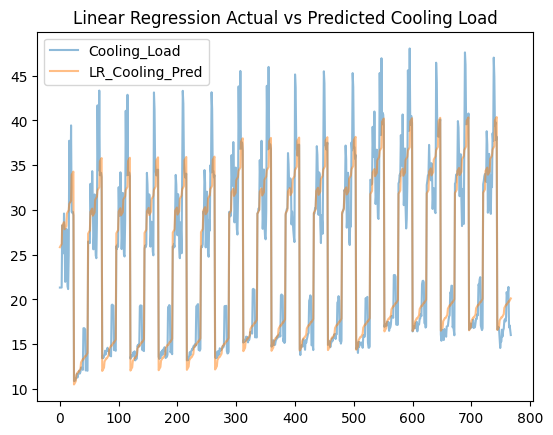

In [156]:
y[['Cooling_Load', 'LR_Cooling_Pred']].plot(alpha=0.5, title="Linear Regression Actual vs Predicted Cooling Load")

In [89]:
paramsLRCool = pd.Series(modelLRCool.coef_, index=X.columns)
paramsLRCool

Relative_Compactness        -7.081649e+01
Surface_Area                 2.509108e+10
Wall_Area                   -2.509108e+10
Roof_Area                   -5.018217e+10
Overall_Height               4.283675e+00
Orientation                  1.214815e-01
Glazing_Area                 1.471709e+01
Glazing_Area_Distribution    4.069562e-02
dtype: float64

In [90]:
np.random.seed(1)
errLRCool = np.std([modelLRCool.fit(*resample(X, y['Cooling_Load'])).coef_
              for i in range(1000)], 0)

In [91]:
print(pd.DataFrame({'effect': paramsLRCool.round(0),
                    'error': errLRCool.round(0)}))

                                 effect         error
Relative_Compactness      -7.100000e+01  7.000000e+00
Surface_Area               2.509108e+10  9.697352e+11
Wall_Area                 -2.509108e+10  9.697352e+11
Roof_Area                 -5.018217e+10  1.939470e+12
Overall_Height             4.000000e+00  0.000000e+00
Orientation                0.000000e+00  0.000000e+00
Glazing_Area               1.500000e+01  1.000000e+00
Glazing_Area_Distribution  0.000000e+00  0.000000e+00


The X axis here is essentially the list of houses. We do not have anything like year to use for the X axis, so I think the list of houses is OK. It might make a better graph if I sort them by the appropriate y value.

### Task 2.2.1

Ridge Heating

In [180]:
param_grid = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]}
grid = GridSearchCV(Ridge(), param_grid, cv=7)
grid.fit(X, y['Heating_Load'])
grid.best_params_

{'alpha': 1e-05}

In [181]:
modelRHeat = Ridge(alpha=0.00001)
modelRHeat.fit(X, y['Heating_Load'])
y['R_Heating_Pred'] = modelRHeat.predict(X)

print("")
print("Ridge heating intercept:")
print(modelRHeat.intercept_)
print("Ridge heating coefficients:")
print(modelRHeat.coef_)


Ridge heating intercept:
84.000039143326
Ridge heating coefficients:
[-6.47660385e+01 -6.25450593e-02  3.60778008e-02 -4.94652299e-02
  4.17010553e+00 -2.33281248e-02  1.99326648e+01  2.03772051e-01]


<Axes: title={'center': 'Ridge Actual vs Predicted Heating Load'}>

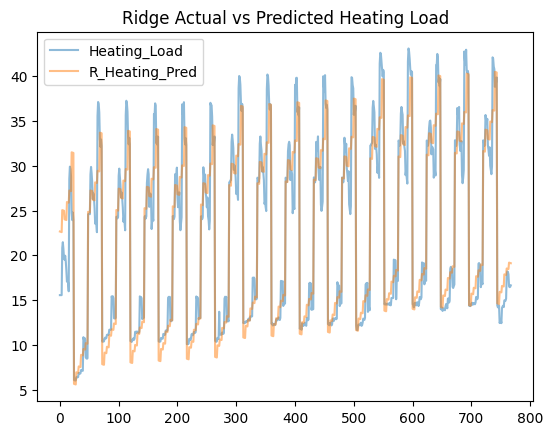

In [175]:
y[['Heating_Load', 'R_Heating_Pred']].plot(alpha=0.5, title="Ridge Actual vs Predicted Heating Load")

In [176]:
paramsRHeat = pd.Series(modelRHeat.coef_, index=X.columns)
paramsRHeat

Relative_Compactness        -63.988261
Surface_Area                 -0.061617
Wall_Area                     0.036096
Roof_Area                    -0.048858
Overall_Height                4.186409
Orientation                  -0.023328
Glazing_Area                 19.931147
Glazing_Area_Distribution     0.203800
dtype: float64

In [51]:
np.random.seed(1)
errRHeat = np.std([modelRHeat.fit(*resample(X, y['Heating_Load'])).coef_
              for i in range(1000)], 0)

In [52]:
print(pd.DataFrame({'effect': paramsRHeat.round(0),
                    'error': errRHeat.round(0)}))

                           effect  error
Relative_Compactness        -29.0    3.0
Surface_Area                 -0.0    0.0
Wall_Area                     0.0    0.0
Roof_Area                    -0.0    0.0
Overall_Height                5.0    0.0
Orientation                  -0.0    0.0
Glazing_Area                 20.0    1.0
Glazing_Area_Distribution     0.0    0.0


{Summarize}

### Task 2.2.2

Ridge Cooling

In [182]:
param_grid = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]}
grid = GridSearchCV(Ridge(), param_grid, cv=7)
grid.fit(X, y['Cooling_Load'])
grid.best_params_

{'alpha': 1e-05}

In [183]:
modelRCool = Ridge(alpha=0.00001)
modelRCool.fit(X, y['Cooling_Load'])
y['R_Cooling_Pred'] = modelRCool.predict(X)

print("")
print("Ridge cooling intercept:")
print(modelRCool.intercept_)
print("Ridge cooling coefficients:")
print(modelRCool.coef_)


Ridge cooling intercept:
97.22992024038118
Ridge cooling coefficients:
[-7.07790150e+01 -6.60294188e-02  2.24771441e-02 -4.44035272e-02
  4.28402555e+00  1.21510415e-01  1.47170570e+01  4.06974667e-02]


<Axes: title={'center': 'Ridge Actual vs Predicted Cooling Load'}>

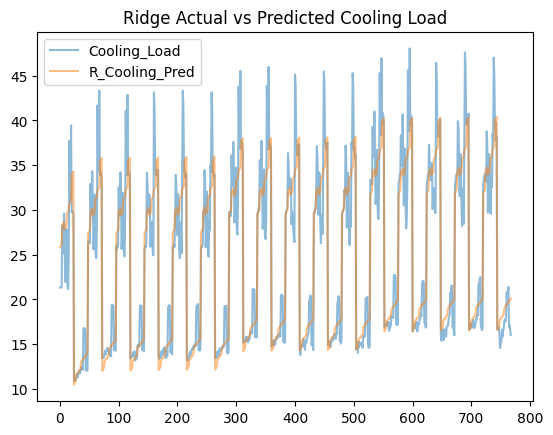

In [184]:
y[['Cooling_Load', 'R_Cooling_Pred']].plot(alpha=0.5, title="Ridge Actual vs Predicted Cooling Load")

In [185]:
paramsRCool = pd.Series(modelRCool.coef_, index=X.columns)
paramsRCool

Relative_Compactness        -70.779015
Surface_Area                 -0.066029
Wall_Area                     0.022477
Roof_Area                    -0.044404
Overall_Height                4.284026
Orientation                   0.121510
Glazing_Area                 14.717057
Glazing_Area_Distribution     0.040697
dtype: float64

In [186]:
np.random.seed(1)
errRCool = np.std([modelRCool.fit(*resample(X, y['Cooling_Load'])).coef_
              for i in range(1000)], 0)

In [187]:
print(pd.DataFrame({'effect': paramsRCool.round(0),
                    'error': errRCool.round(0)}))

                           effect  error
Relative_Compactness        -71.0    7.0
Surface_Area                 -0.0    0.0
Wall_Area                     0.0    0.0
Roof_Area                    -0.0    0.0
Overall_Height                4.0    0.0
Orientation                   0.0    0.0
Glazing_Area                 15.0    1.0
Glazing_Area_Distribution     0.0    0.0


{Summarize}

### Task 2.3.1

Lasso Heating

In [197]:
param_grid = {'alpha': [1, 0.1]}
grid = GridSearchCV(Lasso(), param_grid, cv=7)
grid.fit(X, y['Heating_Load'])
grid.best_params_

{'alpha': 0.1}

With the value of 0.001 included, the result did not converge. Using 0.01 worked but later steps had convergence errors.

In [198]:
modelLHeat = Lasso(alpha=0.1)
modelLHeat.fit(X, y['Heating_Load'])
y['L_Heating_Pred'] = modelLHeat.predict(X)

print("")
print("Lasso heating intercept:")
print(modelLHeat.intercept_)
print("Lasso heating coefficients:")
print(modelLHeat.coef_)


Lasso heating intercept:
-25.671908646088944
Lasso heating coefficients:
[-0.00000000e+00  4.01452078e-03  4.81691342e-02 -0.00000000e+00
  4.92841928e+00 -0.00000000e+00  1.41308784e+01  2.68276276e-01]


<Axes: title={'center': 'Lasso Actual vs Predicted Heating Load'}>

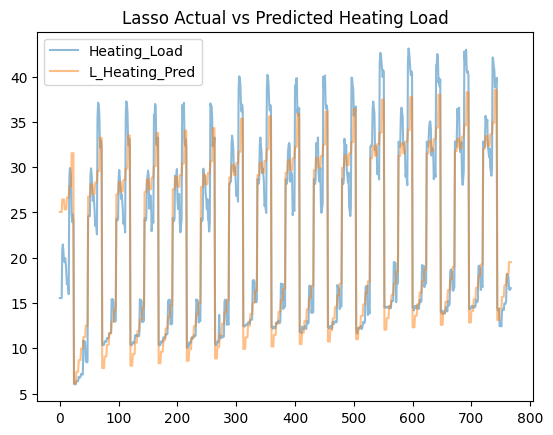

In [199]:
y[['Heating_Load', 'L_Heating_Pred']].plot(alpha=0.5, title="Lasso Actual vs Predicted Heating Load")

In [200]:
paramsLHeat = pd.Series(modelLHeat.coef_, index=X.columns)
paramsLHeat

Relative_Compactness         -0.000000
Surface_Area                  0.004015
Wall_Area                     0.048169
Roof_Area                    -0.000000
Overall_Height                4.928419
Orientation                  -0.000000
Glazing_Area                 14.130878
Glazing_Area_Distribution     0.268276
dtype: float64

In [201]:
np.random.seed(1)
errLHeat = np.std([modelLHeat.fit(*resample(X, y['Heating_Load'])).coef_
              for i in range(1000)], 0)

In [202]:
print(pd.DataFrame({'effect': paramsLHeat.round(0),
                    'error': errLHeat.round(0)}))

                           effect  error
Relative_Compactness         -0.0    0.0
Surface_Area                  0.0    0.0
Wall_Area                     0.0    0.0
Roof_Area                    -0.0    0.0
Overall_Height                5.0    0.0
Orientation                  -0.0    0.0
Glazing_Area                 14.0    1.0
Glazing_Area_Distribution     0.0    0.0


{Summarize}

### Task 2.3.2

Lasso Cooling

In [211]:
param_grid = {'alpha': [1, 0.1]}
grid = GridSearchCV(Lasso(), param_grid, cv=7)
grid.fit(X, y['Cooling_Load'])
grid.best_params_

{'alpha': 0.1}

In [212]:
modelLCool = Lasso(alpha=0.1)
modelLCool.fit(X, y['Cooling_Load'])
y['L_Cooling_Pred'] = modelLCool.predict(X)

print("")
print("Lasso cooling intercept:")
print(modelLCool.intercept_)
print("Lasso cooling coefficients:")
print(modelLCool.coef_)


Lasso cooling intercept:
-23.035803667190535
Lasso cooling coefficients:
[-0.          0.01259381  0.02982036 -0.          5.16871044  0.04151042
  8.91526652  0.10520176]


<Axes: title={'center': 'Lasso Actual vs Predicted Cooling Load'}>

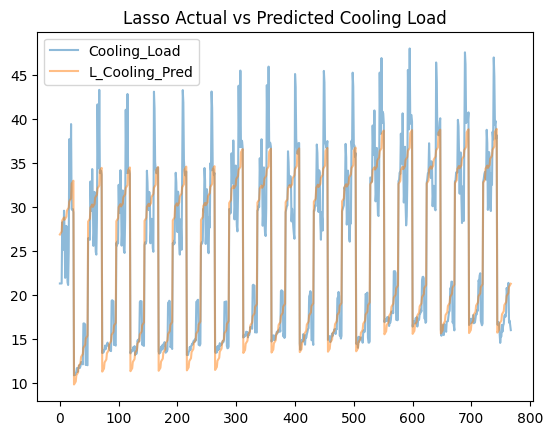

In [208]:
y[['Cooling_Load', 'L_Cooling_Pred']].plot(alpha=0.5, title="Lasso Actual vs Predicted Cooling Load")

In [209]:
paramsLCool = pd.Series(modelLCool.coef_, index=X.columns)
paramsLCool

Relative_Compactness         -0.000000
Surface_Area                  0.024176
Wall_Area                     0.018369
Roof_Area                    -0.002705
Overall_Height                5.710351
Orientation                   0.113510
Glazing_Area                 14.136888
Glazing_Area_Distribution     0.047148
dtype: float64

In [213]:
np.random.seed(1)
errLCool = np.std([modelLCool.fit(*resample(X, y['Cooling_Load'])).coef_
              for i in range(1000)], 0)

In [214]:
print(pd.DataFrame({'effect': paramsLCool.round(0),
                    'error': errLCool.round(0)}))

                           effect  error
Relative_Compactness         -0.0    0.0
Surface_Area                  0.0    0.0
Wall_Area                     0.0    0.0
Roof_Area                    -0.0    0.0
Overall_Height                6.0    0.0
Orientation                   0.0    0.0
Glazing_Area                 14.0    1.0
Glazing_Area_Distribution     0.0    0.0


{Summarize}

### Task 2.4.1

Elastic Net Heating

In [227]:
param_grid = {'alpha': [1, 0.1]}
grid = GridSearchCV(ElasticNet(), param_grid, cv=7)
grid.fit(X, y['Heating_Load'])
grid.best_params_

{'alpha': 0.1}

In [222]:
modelENHeat = ElasticNet(alpha=0.1, random_state=65)
modelENHeat.fit(X, y['Heating_Load'])
y['EN_Heating_Pred'] = modelENHeat.predict(X)

print("")
print("Elastic Net heating intercept:")
print(modelLHeat.intercept_)
print("Elastic Net heating coefficients:")
print(modelLHeat.coef_)


Lasso heating intercept:
-24.870181222969077
Lasso heating coefficients:
[-0.00000000e+00  3.09918554e-03  5.04712384e-02 -0.00000000e+00
  4.84555816e+00  0.00000000e+00  1.40054256e+01  1.14204071e-01]


<Axes: title={'center': 'Elastic Net Actual vs Predicted Heating Load'}>

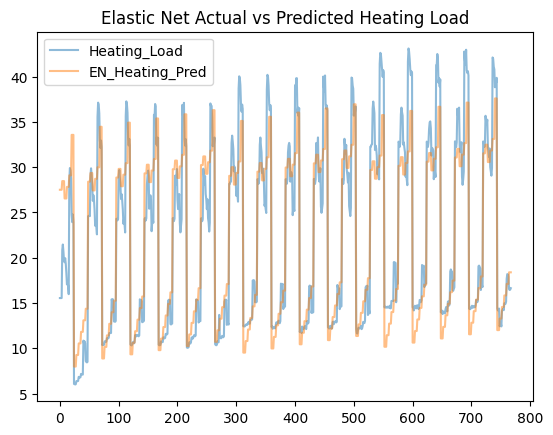

In [223]:
y[['Heating_Load', 'EN_Heating_Pred']].plot(alpha=0.5, title="Elastic Net Actual vs Predicted Heating Load")

In [224]:
paramsENHeat = pd.Series(modelENHeat.coef_, index=X.columns)
paramsENHeat

Relative_Compactness        -0.000000
Surface_Area                -0.007560
Wall_Area                    0.059647
Roof_Area                   -0.011054
Overall_Height               4.021849
Orientation                 -0.000000
Glazing_Area                 4.312716
Glazing_Area_Distribution    0.459134
dtype: float64

In [225]:
np.random.seed(1)
errENHeat = np.std([modelENHeat.fit(*resample(X, y['Heating_Load'])).coef_
              for i in range(1000)], 0)

In [226]:
print(pd.DataFrame({'effect': paramsENHeat.round(0),
                    'error': errENHeat.round(0)}))

                           effect  error
Relative_Compactness         -0.0    0.0
Surface_Area                 -0.0    0.0
Wall_Area                     0.0    0.0
Roof_Area                    -0.0    0.0
Overall_Height                4.0    0.0
Orientation                  -0.0    0.0
Glazing_Area                  4.0    0.0
Glazing_Area_Distribution     0.0    0.0


{Summarize}

### Task 2.4.2

Elastic Net Cooling

In [228]:
param_grid = {'alpha': [1, 0.1]}
grid = GridSearchCV(ElasticNet(), param_grid, cv=7)
grid.fit(X, y['Cooling_Load'])
grid.best_params_

{'alpha': 0.1}

In [230]:
modelENCool = ElasticNet(alpha=0.1, random_state=65)
modelENCool.fit(X, y['Cooling_Load'])
y['EN_Cooling_Pred'] = modelENHeat.predict(X)

print("")
print("Elastic Net cooling intercept:")
print(modelLCool.intercept_)
print("Elastic Net cooling coefficients:")
print(modelLCool.coef_)


Elastic Net cooling intercept:
-20.733414712224754
Elastic Net cooling coefficients:
[-0.00000000e+00  9.08411565e-03  3.34913181e-02 -0.00000000e+00
  4.97847025e+00  6.91568059e-02  9.36372184e+00  0.00000000e+00]


<Axes: title={'center': 'Elastic Net Actual vs Predicted Cooling Load'}>

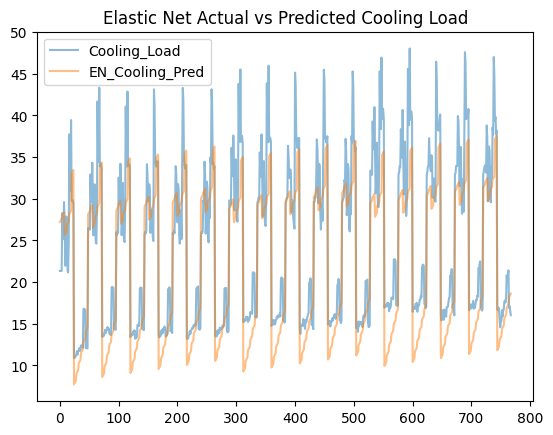

In [231]:
y[['Cooling_Load', 'EN_Cooling_Pred']].plot(alpha=0.5, title="Elastic Net Actual vs Predicted Cooling Load")

In [232]:
paramsENCool = pd.Series(modelENCool.coef_, index=X.columns)
paramsENCool

Relative_Compactness        -0.000000
Surface_Area                -0.001496
Wall_Area                    0.043806
Roof_Area                   -0.008120
Overall_Height               4.206587
Orientation                  0.078375
Glazing_Area                 2.990825
Glazing_Area_Distribution    0.229610
dtype: float64

In [233]:
np.random.seed(1)
errENCool = np.std([modelENCool.fit(*resample(X, y['Cooling_Load'])).coef_
              for i in range(1000)], 0)

In [234]:
print(pd.DataFrame({'effect': paramsENCool.round(0),
                    'error': errENCool.round(0)}))

                           effect  error
Relative_Compactness         -0.0    0.0
Surface_Area                 -0.0    0.0
Wall_Area                     0.0    0.0
Roof_Area                    -0.0    0.0
Overall_Height                4.0    0.0
Orientation                   0.0    0.0
Glazing_Area                  3.0    0.0
Glazing_Area_Distribution     0.0    0.0


{Summarize}

### Task 2.5.1

Random Forest Regression Heating

In [236]:
param_grid = {'n_estimators': [1, 10, 50, 100, 200]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=7)
grid.fit(X, y['Heating_Load'])
grid.best_params_

{'n_estimators': 100}

In [141]:
modelRFRHeat = RandomForestRegressor(100)
modelRFRHeat.fit(X, y['Heating_Load'])
y['RFR_Heating_Pred'] = modelRFRHeat.predict(X)
# No intercept or coefficients

<Axes: title={'center': 'Random Forest Regression Actual vs Predicted Heating Load'}>

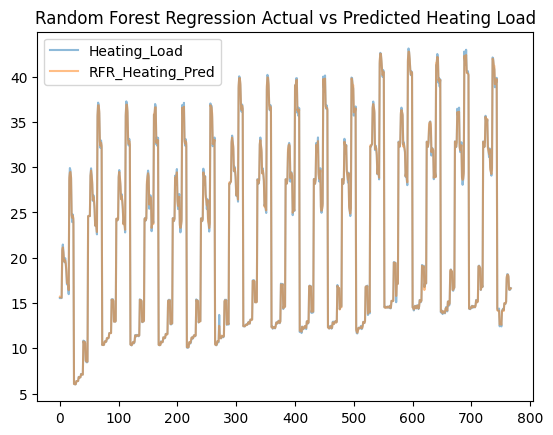

In [162]:
y[['Heating_Load', 'RFR_Heating_Pred']].plot(alpha=0.5, title="Random Forest Regression Actual vs Predicted Heating Load")

### Task 2.5.2

Random Forest Regression Cooling

In [237]:
param_grid = {'n_estimators': [1, 10, 50, 100, 200]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=7)
grid.fit(X, y['Cooling_Load'])
grid.best_params_

{'n_estimators': 50}

In [238]:
modelRFRCool = RandomForestRegressor(50)
modelRFRCool.fit(X, y['Cooling_Load'])
y['RFR_Cooling_Pred'] = modelRFRCool.predict(X)
# No intercept or coefficients

<Axes: title={'center': 'Random Forest Regression Actual vs Predicted Cooling Load'}>

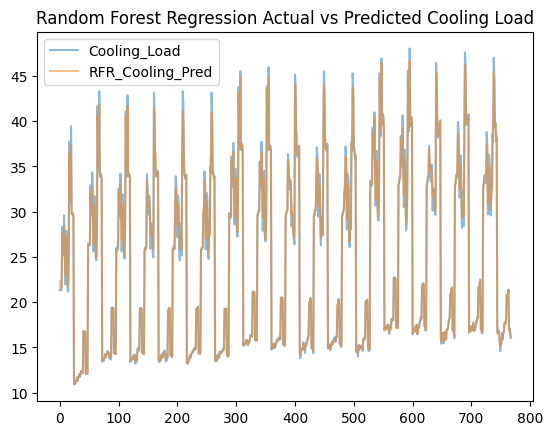

In [163]:
y[['Cooling_Load', 'RFR_Cooling_Pred']].plot(alpha=0.5, title="Random Forest Regression Actual vs Predicted Cooling Load")

## Task 3

Model Evaluations

### Task 3.1

Evaluate models using RMSE, MAE, and R² score

In [239]:
meh = pd.DataFrame(np.array([[mean_squared_error(y['Heating_Load'],  y['LR_Heating_Pred']),mean_squared_error(y['Heating_Load'],  y['R_Heating_Pred']),mean_squared_error(y['Heating_Load'],  y['L_Heating_Pred']), mean_squared_error(y['Heating_Load'],  y['EN_Heating_Pred']), mean_squared_error(y['Heating_Load'],  y['RFR_Heating_Pred']) ]
                             ,[root_mean_squared_error(y['Heating_Load'],  y['LR_Heating_Pred']),root_mean_squared_error(y['Heating_Load'],  y['R_Heating_Pred']),root_mean_squared_error(y['Heating_Load'],  y['L_Heating_Pred']),root_mean_squared_error(y['Heating_Load'],  y['EN_Heating_Pred']),root_mean_squared_error(y['Heating_Load'],  y['RFR_Heating_Pred'])] 
                             ,[mean_absolute_error(y['Heating_Load'],  y['LR_Heating_Pred']),mean_absolute_error(y['Heating_Load'],  y['R_Heating_Pred']),mean_absolute_error(y['Heating_Load'],  y['L_Heating_Pred']),mean_absolute_error(y['Heating_Load'],  y['EN_Heating_Pred']),mean_absolute_error(y['Heating_Load'],  y['RFR_Heating_Pred'])] 
                             ,[r2_score(y['Heating_Load'],  y['LR_Heating_Pred']),r2_score(y['Heating_Load'],  y['R_Heating_Pred']),r2_score(y['Heating_Load'],  y['L_Heating_Pred']),r2_score(y['Heating_Load'],  y['EN_Heating_Pred']),r2_score(y['Heating_Load'],  y['RFR_Heating_Pred'])]
                               ])
                             , columns=["Lin Reg","Ridge","Lasso", "Elastic Net", "Random Forest Regressor"]
                             , index=["MSE","RMSE","MAE","R2"])

mec = pd.DataFrame(np.array([[mean_squared_error(y['Cooling_Load'],  y['LR_Cooling_Pred']),mean_squared_error(y['Cooling_Load'],  y['R_Cooling_Pred']),mean_squared_error(y['Cooling_Load'],  y['L_Cooling_Pred']),mean_squared_error(y['Cooling_Load'],  y['EN_Cooling_Pred']),mean_squared_error(y['Cooling_Load'],  y['RFR_Cooling_Pred']) ]
                             ,[root_mean_squared_error(y['Cooling_Load'],  y['LR_Cooling_Pred']),root_mean_squared_error(y['Cooling_Load'],  y['R_Cooling_Pred']),root_mean_squared_error(y['Cooling_Load'],  y['L_Cooling_Pred']),root_mean_squared_error(y['Cooling_Load'],  y['EN_Cooling_Pred']),root_mean_squared_error(y['Cooling_Load'],  y['RFR_Cooling_Pred'])] 
                             ,[mean_absolute_error(y['Cooling_Load'],  y['LR_Cooling_Pred']),mean_absolute_error(y['Cooling_Load'],  y['R_Cooling_Pred']),mean_absolute_error(y['Cooling_Load'],  y['L_Cooling_Pred']),mean_absolute_error(y['Cooling_Load'],  y['EN_Cooling_Pred']),mean_absolute_error(y['Cooling_Load'],  y['RFR_Cooling_Pred'])] 
                             ,[r2_score(y['Cooling_Load'],  y['LR_Cooling_Pred']),r2_score(y['Cooling_Load'],  y['R_Cooling_Pred']),r2_score(y['Cooling_Load'],  y['L_Cooling_Pred']),r2_score(y['Cooling_Load'],  y['EN_Cooling_Pred']),r2_score(y['Cooling_Load'],  y['RFR_Cooling_Pred'])]
                               ])
                             , columns=["Lin Reg","Ridge","Lasso", "Elastic Net", "Random Forest Regressor"]
                             , index=["MSE","RMSE","MAE","R2"])
print("")
print("The Heating data:")
print(meh)
print("")
print("The Cooling data:")
print(mec)


The Heating data:
       Lin Reg     Ridge     Lasso  Elastic Net  Random Forest Regressor
MSE   8.520195  8.520529  9.599400    13.473897                 0.026899
RMSE  2.918937  2.918995  3.098290     3.670681                 0.164010
MAE   2.066800  2.066869  2.238746     2.715024                 0.108308
R2    0.916205  0.916202  0.905592     0.867487                 0.999735

The Cooling data:
        Lin Reg      Ridge      Lasso  Elastic Net  Random Forest Regressor
MSE   10.141992  10.140892  11.313394    20.048766                 0.355947
RMSE   3.184649   3.184477   3.363539     4.477585                 0.596613
MAE    2.242242   2.242443   2.433241     3.476440                 0.358687
R2     0.887791   0.887804   0.874831     0.778185                 0.996062


### Task 3.2

Assess performance on training and testing datasets.

## Task 4

Target Variable Analysis:
- Develop separate models for Heating Load and Cooling Load as target variables.
- Compare the effectiveness of models for each target.

I performed all of the analysis with heating and cooling separate. It did not make sens to me that I would combine them. So the above analysis covers the effectiveness of the separate models.